In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
import seaborn as sns

In [8]:
import matplotlib.pyplot as plt

<Axes: ylabel='Outcome'>

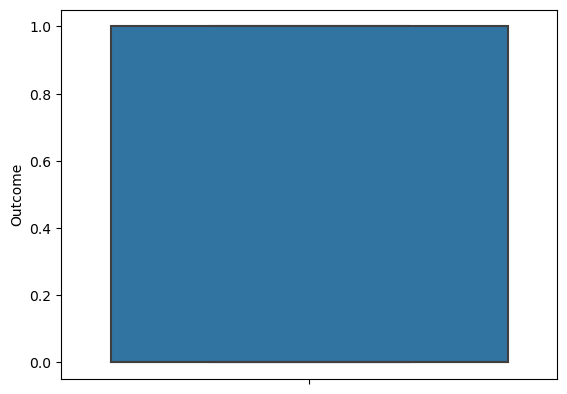

In [126]:
sns.boxplot(data=df, y="Outcome")

In [113]:
lowerLimit = df['Age'].quantile(0.00)
lowerLimit

21.0

In [123]:
upperLimit = df['Age'].quantile(0.982)
upperLimit

65.0

In [17]:
upperLimit

13.0

In [124]:
df['Age'] = df['Age'].clip(lowerLimit, upperLimit )

<Axes: ylabel='Glucose'>

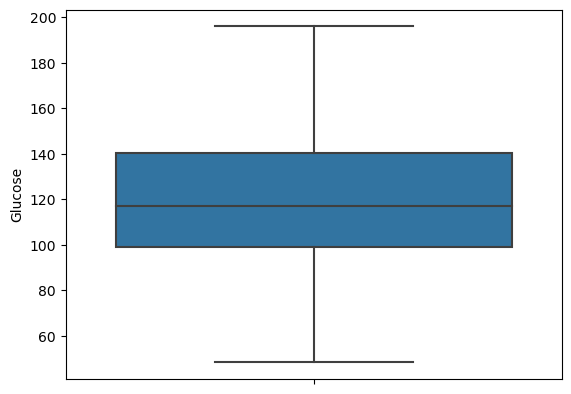

In [37]:
sns.boxplot(data=df, y="Glucose")

In [33]:
lowerLimit = df['Glucose'].quantile(0.007)

In [34]:
lowerLimit

48.42800000000001

In [35]:
upperLimit = df['Glucose'].quantile(0.99)

In [36]:
df['Glucose'] = df['Glucose'].clip(lowerLimit, upperLimit )

In [127]:
scaler = StandardScaler()

In [131]:
X = df.drop(columns='Outcome',axis=1).values
y = df['Outcome'].values

In [132]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [133]:
X = scaler.fit_transform(X)

In [134]:
X

array([[ 0.64935582,  0.86609927,  0.07623414, ...,  0.20610857,
         0.59433861,  1.45565749],
       [-0.8500587 , -1.17017399, -0.36933967, ..., -0.82608547,
        -0.37804613, -0.1883792 ],
       [ 1.24912163,  1.99736219, -0.51786428, ..., -1.31269123,
         0.75287959, -0.10185096],
       ...,
       [ 0.34947292, -0.00658927,  0.07623414, ..., -0.88506799,
        -0.75149823, -0.27490745],
       [-0.8500587 ,  0.15501972, -0.81491349, ..., -0.30998845,
        -0.38509239,  1.19607275],
       [-0.8500587 , -0.91159961, -0.07229046, ..., -0.26575157,
        -0.50487892, -0.88060518]])

In [135]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [137]:
X_train.shape

(614, 8)

In [138]:
clf = svm.SVC(kernel='linear')

In [139]:
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [144]:
X_train_prediction = clf.predict(X_train)
accuracy_score(y_train, X_train_prediction)

0.7768729641693811

In [145]:
X_test_prediction = clf.predict(X_test)
accuracy_score(y_test, X_test_prediction)

0.7662337662337663

In [150]:
input_sample = (5,166,72,19,175,22.7,0.6,51)
X

array([[ 0.64935582,  0.86609927,  0.07623414, ...,  0.20610857,
         0.59433861,  1.45565749],
       [-0.8500587 , -1.17017399, -0.36933967, ..., -0.82608547,
        -0.37804613, -0.1883792 ],
       [ 1.24912163,  1.99736219, -0.51786428, ..., -1.31269123,
         0.75287959, -0.10185096],
       ...,
       [ 0.34947292, -0.00658927,  0.07623414, ..., -0.88506799,
        -0.75149823, -0.27490745],
       [-0.8500587 ,  0.15501972, -0.81491349, ..., -0.30998845,
        -0.38509239,  1.19607275],
       [-0.8500587 , -0.91159961, -0.07229046, ..., -0.26575157,
        -0.50487892, -0.88060518]])

In [147]:
input_np_array = np.asarray(input_sample)

In [157]:
input_np_array.reshape(1,-1)

array([[  5. , 166. ,  72. ,  19. , 175. ,  22.7,   0.6,  51. ]])

In [151]:
X

array([[ 0.64935582,  0.86609927,  0.07623414, ...,  0.20610857,
         0.59433861,  1.45565749],
       [-0.8500587 , -1.17017399, -0.36933967, ..., -0.82608547,
        -0.37804613, -0.1883792 ],
       [ 1.24912163,  1.99736219, -0.51786428, ..., -1.31269123,
         0.75287959, -0.10185096],
       ...,
       [ 0.34947292, -0.00658927,  0.07623414, ..., -0.88506799,
        -0.75149823, -0.27490745],
       [-0.8500587 ,  0.15501972, -0.81491349, ..., -0.30998845,
        -0.38509239,  1.19607275],
       [-0.8500587 , -0.91159961, -0.07229046, ..., -0.26575157,
        -0.50487892, -0.88060518]])

In [154]:
predictor = clf.predict(input_np_array.reshape(1,-1))

In [158]:
predictor

array([1], dtype=int64)

In [161]:
if (predictor==0):
    print("Person is not diabetic")
else:
    print("Person is diabetic")

Person is diabetic
